# Stock Movement using K-Means Clustering


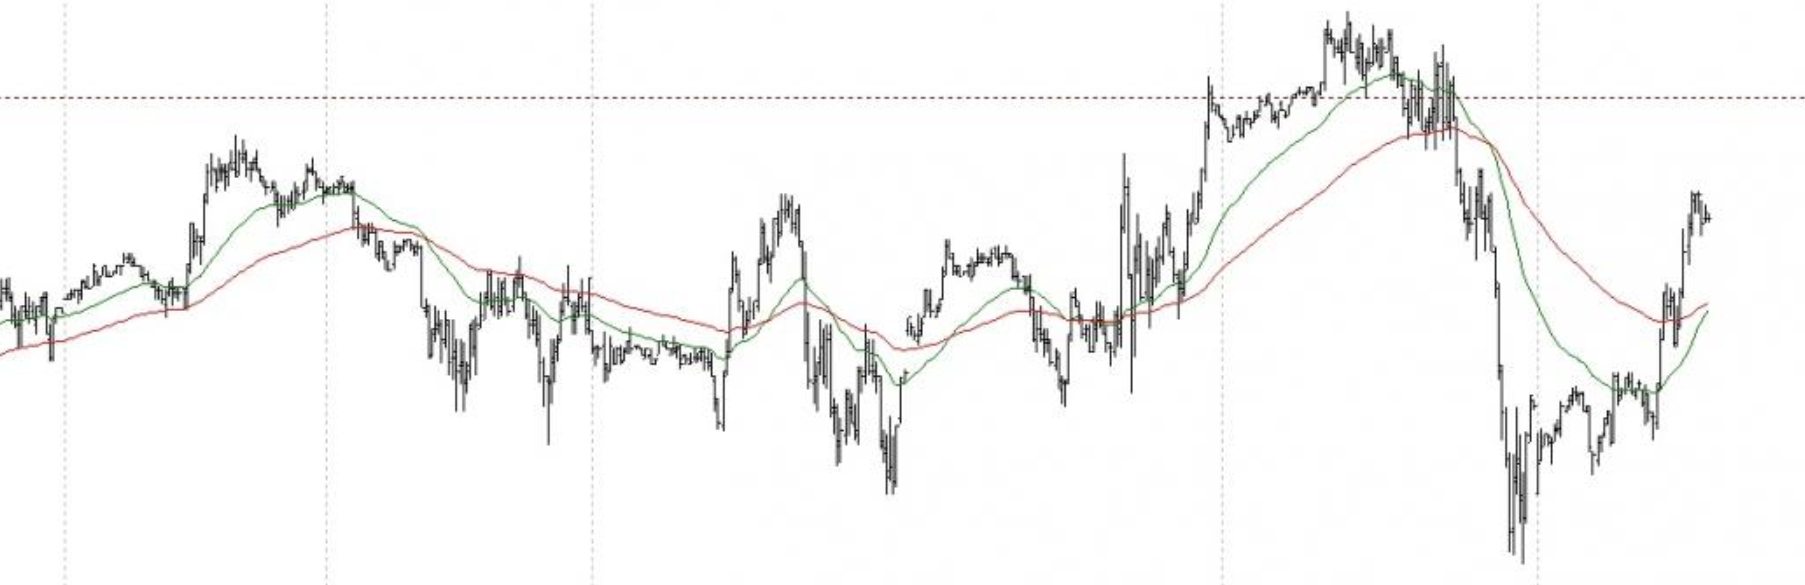

The given dataset contains the closing stock prices for S&P500 stocks for a period of time. Their symbols show on the column headers. The companies operate in 10 sectors as follows (from SP500Companies.xls):

Health Care

Financials

Information Technology

Industrials

Utilities

Materials

Consumer Staples

Consumer Discretionary

Energy

Telecommunications Services

In the preprocessing step, a new data set is created to indicate if the stock prices increase compared with the previous day (1 or 0 corresponding to UP or DOWN). The matrix is then transposed such that the up/down movement of a stock is in in a row. The model will cluster rows/points in a number of clusters. Here the number of clusters is chosen to be 10 to see if the stocks (or most of) of companies operating in the same sectors happen to be grouped together.

The km function implements the K-means algorithm. The outer loop loops for a number of max iterations. The first inner loop assigns each example/point to a cluster. The 2nd loop re-computes the centroids of the clusters.


Write a function km that implements the k-means algorithm. The input arguments are the data set X, number of K clusters, and the maximum number of iterations. The function returns an n-by-1 matrix (n is the number of instances), each element in the matrix stores the cluster number of the associated instance. 

In [15]:
############################################
# K-means based Clustering for Stock Prices#
############################################

import numpy as np
import csv
import random
import os


def dist(a, b, axis = 1):
    return np.sum((a - b)**2, axis = 1)

def km(X, K, max_iters):
    # Write code to return the cluster numbers 
    row, col = X.shape
    centroids = np.random.rand(K, col)
    idx = np.zeros((row, 1))
    
    for i in range(max_iters):
        for j in range(row):
            distance = dist(np.tile(X[j], (K, 1)), centroids)
            idx[j] = np.argmin(distance)
            
        for k in range(K):
            labels = np.squeeze(idx == k)
            centroids[k] = np.mean(np.squeeze(X[np.where(labels), :]), axis = 0)
    
    
    return idx

with open("/Users/nsy/Documents/Grad2/5671/HW6/sp500_short_period.csv") as csvfile:
    csvData = csv.reader(csvfile)
    datList = []
    for row in csvData:
        datList.append(row)

symbols = np.array(datList.pop(0))

data = np.array(datList)
data = data.astype(np.float)
c = np.double((data[1:np.size(data, 0), :] - data[0:np.size(data, 0) - 1, :]) > 0)
movement = np.transpose(c)

K = 10                          # 10 sectors so that 10 classes
max_iters = 1000                # maximum iterations
random.seed(1234)
idx = km(movement, K, max_iters)

for k in range(K):
    print('\nStocks in group %d moving up together\n' % (k+1))
    k = np.array(k)
    index = np.squeeze(idx == k)
    print(symbols[np.where(index)])


Stocks in group 1 moving up together

['ABT' 'ACE' 'AET' 'AGN' 'MO' 'ABC' 'AMGN' 'ADM' 'ADP' 'BAX' 'BDX' 'HRB'
 'BA' 'BMY' 'BF.B' 'CPB' 'CAH' 'CFN' 'CERN' 'CB' 'CI' 'CTAS' 'CLX' 'KO'
 'CCE' 'CL' 'CAG' 'COST' 'COV' 'CCI' 'CVS' 'DVA' 'DTV' 'DPS' 'FIS' 'FISV'
 'FRX' 'GIS' 'HSY' 'HRL' 'HUM' 'IFF' 'JNJ' 'K' 'KMB' 'KMI' 'KR' 'LH'
 'LIFE' 'LLY' 'LMT' 'LO' 'MKC' 'MCD' 'MCK' 'MDT' 'MRK' 'TAP' 'MON' 'MYL'
 'PDCO' 'PAYX' 'PEP' 'PRGO' 'PFE' 'PM' 'PG' 'DGX' 'RTN' 'RSG' 'RAI' 'SIAL'
 'SJM' 'SRCL' 'SYK' 'SYY' 'TGT' 'TWC' 'UNH' 'V' 'WMT' 'WAG' 'WM' 'WLP'
 'WFM' 'ZMH']

Stocks in group 2 moving up together

['MMM' 'AFL' 'A' 'APD' 'ARG' 'AXP' 'AIG' 'AMP' 'APH' 'ADI' 'AON' 'AIZ'
 'AVY' 'AVP' 'BLL' 'BAC' 'BBT' 'BMS' 'BRK.B' 'BLK' 'BWA' 'COF' 'KMX' 'CBG'
 'CINF' 'C' 'CME' 'CMA' 'CSC' 'GLW' 'CSX' 'CMI' 'DHR' 'DLPH' 'XRAY' 'DFS'
 'DOW' 'ETFC' 'DD' 'EMN' 'ETN' 'ECL' 'EMR' 'FITB' 'FHN' 'FLIR' 'FLS' 'FLR'
 'FMC' 'F' 'BEN' 'GME' 'GD' 'GE' 'GNW' 'GS' 'GT' 'GWW' 'HOG' 'HAR' 'HRS'
 'HIG' 'HON' 'HST' 'HCBK' 'HBAN' 